# Sign Language Interpretation

## Data Collection

## Fingerpoint using mediapipe

In [1]:
import cv2
from cvzone.HandTrackingModule import HandDetector
import numpy as np
import math
import time

cap = cv2.VideoCapture(0)
detector = HandDetector(maxHands=1)
offset = 20
imgSize = 300
counter = 0

folder = 'Data/nanri'

while True:
    success, img = cap.read()
    hands, img = detector.findHands(img)
    if hands:
        hand = hands[0]
        x, y, w, h= hand['bbox']
        
        imgWhite = np.ones((imgSize, imgSize, 3), np.uint8)*255
        imgCrop = img[y-offset: y+h+offset, x-offset: x+w+offset]
        imgCropSize = imgCrop.shape

        aspectRatio = h/w

        if aspectRatio > 1:
            k = imgSize/h
            wCal = math.ceil(k*w)
            imgResize = cv2.resize(imgCrop, (wCal, imgSize))
            imgResizeShape = imgResize.shape
            wGap = math.ceil((imgSize-wCal)/2)
            imgWhite[:, wGap: wCal + wGap] = imgResize
        else:
            k = imgSize/w
            hCal = math.ceil(k*h)
            imgResize = cv2.resize(imgCrop, (imgSize, hCal))
            imgResizeShape = imgResize.shape
            hGap = math.ceil((imgSize-hCal)/2)
            imgWhite[hGap: hCal + hGap, :] = imgResize
        cv2.imshow('ImageCrop', imgCrop)
        cv2.imshow('ImageWhite', imgWhite)
    cv2.imshow('Image', img)
    key = cv2.waitKey(1)
    if key == ord("s"):
        counter += 1
        cv2.imwrite(f'{folder}/Image_{time.time()}.jpg', imgWhite)
        print(counter)
    if key == ord('q'):
        cap.release()  # Release the camera
        cv2.destroyAllWindows()  # Destroy all OpenCV windows
        break


1
2
3
4


## Grayscale data Collection

In [2]:
# Importing the Libraries Required

import os
import string

# Creating the directory Structure

if not os.path.exists("gray/dataSet"):
    os.makedirs("gray/dataSet")

if not os.path.exists("gray/dataSet/trainingData"):
    os.makedirs("gray/dataSet/trainingData")

if not os.path.exists("gray/dataSet/testingData"):
    os.makedirs("gray/dataSet/testingData")

# List of Tamil uyir letters
uyir_letters = ['அ', 'ஆ', 'இ', 'ஈ', 'உ', 'ஊ', 'எ', 'ஏ', 'ஐ', 'ஒ', 'ஓ', 'ஔ', 'ஃ']

# List of Tamil mei letters
mei_letters = ['க்', 'ங்', 'ச்', 'ஞ்', 'ட்', 'ண்', 'த்', 'ந்', 'ப்', 'ம்', 'ய்', 'ர்', 'ல்', 'வ்', 'ழ்', 'ள்', 'ற்', 'ன்']

for letter in uyir_letters:
    folder_path = f"gray/dataSet/trainingData/{letter}"
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)
    folder_path = f"gray/dataSet/testingData/{letter}"
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)

for letter in mei_letters:
    folder_path = f"gray/dataSet/trainingData/{letter}"
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)
    folder_path = f"gray/dataSet/testingData/{letter}"
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)

### Training dataset

In [4]:
# Importing the Libraries Required

import cv2
import numpy as np
import os

# Creating and Collecting Training Data

mode = 'trainingData'
directory = 'gray/dataSet/' + mode + '/'
minValue = 70

capture = cv2.VideoCapture(0)
interrupt = -1

transliteration_dict = {
    'a': 'அ', 'b': 'ஆ', 'c': 'இ', 'd': 'ஈ', 'e': 'உ', 'f': 'ஊ', 'g': 'எ', 'h': 'ஏ', 'i': 'ஐ', 'j': 'ஒ',
    'k': 'ஓ', 'l': 'ஔ', 'm': 'ஃ', 'n': 'க்', 'o': 'ங்', 'p': 'ச்', 'q': 'ஞ்', 'r': 'ட்', 's': 'ண்',
    't': 'த்', 'u': 'ந்', 'v': 'ப்', 'w': 'ம்', 'x': 'ய்', 'y': 'ர்', 'z': 'ல்', '0': 'வ்', '1': 'ழ்',
    '2': 'ள்', '3': 'ற்', '4': 'ன்'
}

while True:
    _, frame = capture.read()

    # Simulating mirror Image

    frame = cv2.flip(frame, 1)

    # Getting count of existing images

    count = {

        # Uyir letters count
        'அ': len(os.listdir(directory+"/அ")),
        'ஆ': len(os.listdir(directory+"/ஆ")),
        'இ': len(os.listdir(directory+"/இ")),
        'ஈ': len(os.listdir(directory+"/ஈ")),
        'உ': len(os.listdir(directory+"/உ")),
        'ஊ': len(os.listdir(directory+"/ஊ")),
        'எ': len(os.listdir(directory+"/எ")),
        'ஏ': len(os.listdir(directory+"/ஏ")),
        'ஐ': len(os.listdir(directory+"/ஐ")),
        'ஒ': len(os.listdir(directory+"/ஒ")),
        'ஓ': len(os.listdir(directory+"/ஓ")),
        'ஔ': len(os.listdir(directory+"/ஔ")),
        'ஃ': len(os.listdir(directory+"/ஃ")),

        # Mei letters count
        'க்': len(os.listdir(directory+"/க்")),
        'ங்': len(os.listdir(directory+"/ங்")),
        'ச்': len(os.listdir(directory+"/ச்")),
        'ஞ்': len(os.listdir(directory+"/ஞ்")),
        'ட்': len(os.listdir(directory+"/ட்")),
        'ண்': len(os.listdir(directory+"/ண்")),
        'த்': len(os.listdir(directory+"/த்")),
        'ந்': len(os.listdir(directory+"/ந்")),
        'ப்': len(os.listdir(directory+"/ப்")),
        'ம்': len(os.listdir(directory+"/ம்")),
        'ய்': len(os.listdir(directory+"/ய்")),
        'ர்': len(os.listdir(directory+"/ர்")),
        'ல்': len(os.listdir(directory+"/ல்")),
        'வ்': len(os.listdir(directory+"/வ்")),
        'ழ்': len(os.listdir(directory+"/ழ்")),
        'ள்': len(os.listdir(directory+"/ள்")),
        'ற்': len(os.listdir(directory+"/ற்")),
        'ன்': len(os.listdir(directory+"/ன்")),
    }


    # Printing the count of each set on the screen
    
    cv2.putText(frame, "a : " + str(count['அ']), (10, 70), cv2.FONT_HERSHEY_PLAIN, 1, (0,255,255), 1)
    cv2.putText(frame, "aa : " + str(count['ஆ']), (10, 80), cv2.FONT_HERSHEY_PLAIN, 1, (0,255,255), 1)
    cv2.putText(frame, "i : " + str(count['இ']), (10, 90), cv2.FONT_HERSHEY_PLAIN, 1, (0,255,255), 1)
    cv2.putText(frame, "ii : " + str(count['ஈ']), (10, 100), cv2.FONT_HERSHEY_PLAIN, 1, (0,255,255), 1)
    cv2.putText(frame, "u : " + str(count['உ']), (10, 110), cv2.FONT_HERSHEY_PLAIN, 1, (0,255,255), 1)
    cv2.putText(frame, "uu : " + str(count['ஊ']), (10, 120), cv2.FONT_HERSHEY_PLAIN, 1, (0,255,255), 1)
    cv2.putText(frame, "e : " + str(count['எ']), (10, 130), cv2.FONT_HERSHEY_PLAIN, 1, (0,255,255), 1)
    cv2.putText(frame, "ee : " + str(count['ஏ']), (10, 140), cv2.FONT_HERSHEY_PLAIN, 1, (0,255,255), 1)
    cv2.putText(frame, "ai : " + str(count['ஐ']), (10, 150), cv2.FONT_HERSHEY_PLAIN, 1, (0,255,255), 1)
    cv2.putText(frame, "o : " + str(count['ஒ']), (10, 160), cv2.FONT_HERSHEY_PLAIN, 1, (0,255,255), 1)
    cv2.putText(frame, "oo : " + str(count['ஓ']), (10, 170), cv2.FONT_HERSHEY_PLAIN, 1, (0,255,255), 1)
    cv2.putText(frame, "au : " + str(count['ஔ']), (10, 180), cv2.FONT_HERSHEY_PLAIN, 1, (0,255,255), 1)
    cv2.putText(frame, "ak : " + str(count['ஃ']), (10, 190), cv2.FONT_HERSHEY_PLAIN, 1, (0,255,255), 1)

    cv2.putText(frame, "ik : " + str(count['க்']), (10, 200), cv2.FONT_HERSHEY_PLAIN, 1, (0,255,255), 1)
    cv2.putText(frame, "ing : " + str(count['ங்']), (10, 210), cv2.FONT_HERSHEY_PLAIN, 1, (0,255,255), 1)
    cv2.putText(frame, "ich : " + str(count['ச்']), (10, 220), cv2.FONT_HERSHEY_PLAIN, 1, (0,255,255), 1)
    cv2.putText(frame, "inj : " + str(count['ஞ்']), (10, 230), cv2.FONT_HERSHEY_PLAIN, 1, (0,255,255), 1)
    cv2.putText(frame, "it : " + str(count['ட்']), (10, 240), cv2.FONT_HERSHEY_PLAIN, 1, (0,255,255), 1)
    cv2.putText(frame, "in : " + str(count['ண்']), (10, 250), cv2.FONT_HERSHEY_PLAIN, 1, (0,255,255), 1)
    cv2.putText(frame, "ith : " + str(count['த்']), (10, 260), cv2.FONT_HERSHEY_PLAIN, 1, (0,255,255), 1)
    cv2.putText(frame, "ind : " + str(count['ந்']), (10, 270), cv2.FONT_HERSHEY_PLAIN, 1, (0,255,255), 1)
    cv2.putText(frame, "ip : " + str(count['ப்']), (10, 280), cv2.FONT_HERSHEY_PLAIN, 1, (0,255,255), 1)
    cv2.putText(frame, "im : " + str(count['ம்']), (10, 290), cv2.FONT_HERSHEY_PLAIN, 1, (0,255,255), 1)
    cv2.putText(frame, "iy : " + str(count['ய்']), (10, 300), cv2.FONT_HERSHEY_PLAIN, 1, (0,255,255), 1)
    cv2.putText(frame, "ir : " + str(count['ர்']), (10, 310), cv2.FONT_HERSHEY_PLAIN, 1, (0,255,255), 1)
    cv2.putText(frame, "il : " + str(count['ல்']), (10, 320), cv2.FONT_HERSHEY_PLAIN, 1, (0,255,255), 1)
    cv2.putText(frame, "iv : " + str(count['வ்']), (10, 330), cv2.FONT_HERSHEY_PLAIN, 1, (0,255,255), 1)
    cv2.putText(frame, "izh : " + str(count['ழ்']), (10, 340), cv2.FONT_HERSHEY_PLAIN, 1, (0,255,255), 1)
    cv2.putText(frame, "ill : " + str(count['ள்']), (10, 350), cv2.FONT_HERSHEY_PLAIN, 1, (0,255,255), 1)
    cv2.putText(frame, "irr : " + str(count['ற்']), (10, 360), cv2.FONT_HERSHEY_PLAIN, 1, (0,255,255), 1)
    cv2.putText(frame, "inn : " + str(count['ன்']), (10, 370), cv2.FONT_HERSHEY_PLAIN, 1, (0,255,255), 1)

    # Coordinates of the ROI
    
    x1 = int(0.5*frame.shape[1])
    y1 = 10
    x2 = frame.shape[1]-10
    y2 = int(0.5*frame.shape[1])

    # Drawing the ROI
    # The increment/decrement by 1 is to compensate for the bounding box
    
    cv2.rectangle(frame, (x1-1, y1-1), (x2+1, y2+1), (255,0,0) ,1)
    
    # Extracting the ROI
    
    roi = frame[y1:y2, x1:x2]

    cv2.imshow("Frame", frame)
    
    # Image Processing

    gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (5,5), 2)
        
    th3 = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)
    ret, test_image = cv2.threshold(th3, minValue, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    
    # Output Image after the Image Processing that is used for data collection 

    test_image = cv2.resize(test_image, (300,300))
    cv2.imshow("test", test_image)

    # Data Collection

    interrupt = cv2.waitKey(10)
    if interrupt & 0xFF == 27: 
        # esc key
        break

    # Loop through transliteration dictionary
    for key, value in transliteration_dict.items():
        # Check if the key is pressed
        if interrupt & 0xFF == ord(key):
            # Save the image with the corresponding letter
            cv2.imwrite(directory + value + '/' + str(count[value]) + '.jpg', test_image)
        
    
capture.release()
cv2.destroyAllWindows()

### Testing dataset

In [5]:
# Importing the Libraries Required

import cv2
import numpy as np
import os

# Creating and Collecting Training Data

mode = 'testingData'
directory = 'gray/dataSet/' + mode + '/'
minValue = 35

capture = cv2.VideoCapture(0)
interrupt = -1

transliteration_dict = {
    'a': 'அ', 'b': 'ஆ', 'c': 'இ', 'd': 'ஈ', 'e': 'உ', 'f': 'ஊ', 'g': 'எ', 'h': 'ஏ', 'i': 'ஐ', 'j': 'ஒ',
    'k': 'ஓ', 'l': 'ஔ', 'm': 'ஃ', 'n': 'க்', 'o': 'ங்', 'p': 'ச்', 'q': 'ஞ்', 'r': 'ட்', 's': 'ண்',
    't': 'த்', 'u': 'ந்', 'v': 'ப்', 'w': 'ம்', 'x': 'ய்', 'y': 'ர்', 'z': 'ல்', '0': 'வ்', '1': 'ழ்',
    '2': 'ள்', '3': 'ற்', '4': 'ன்'
}

while True:
    _, frame = capture.read()

    # Simulating mirror Image

    frame = cv2.flip(frame, 1)

    # Getting count of existing images

    count = {

        # Uyir letters count
        'அ': len(os.listdir(directory+"/அ")),
        'ஆ': len(os.listdir(directory+"/ஆ")),
        'இ': len(os.listdir(directory+"/இ")),
        'ஈ': len(os.listdir(directory+"/ஈ")),
        'உ': len(os.listdir(directory+"/உ")),
        'ஊ': len(os.listdir(directory+"/ஊ")),
        'எ': len(os.listdir(directory+"/எ")),
        'ஏ': len(os.listdir(directory+"/ஏ")),
        'ஐ': len(os.listdir(directory+"/ஐ")),
        'ஒ': len(os.listdir(directory+"/ஒ")),
        'ஓ': len(os.listdir(directory+"/ஓ")),
        'ஔ': len(os.listdir(directory+"/ஔ")),
        'ஃ': len(os.listdir(directory+"/ஃ")),

        # Mei letters count
        'க்': len(os.listdir(directory+"/க்")),
        'ங்': len(os.listdir(directory+"/ங்")),
        'ச்': len(os.listdir(directory+"/ச்")),
        'ஞ்': len(os.listdir(directory+"/ஞ்")),
        'ட்': len(os.listdir(directory+"/ட்")),
        'ண்': len(os.listdir(directory+"/ண்")),
        'த்': len(os.listdir(directory+"/த்")),
        'ந்': len(os.listdir(directory+"/ந்")),
        'ப்': len(os.listdir(directory+"/ப்")),
        'ம்': len(os.listdir(directory+"/ம்")),
        'ய்': len(os.listdir(directory+"/ய்")),
        'ர்': len(os.listdir(directory+"/ர்")),
        'ல்': len(os.listdir(directory+"/ல்")),
        'வ்': len(os.listdir(directory+"/வ்")),
        'ழ்': len(os.listdir(directory+"/ழ்")),
        'ள்': len(os.listdir(directory+"/ள்")),
        'ற்': len(os.listdir(directory+"/ற்")),
        'ன்': len(os.listdir(directory+"/ன்")),
    }

    # Printing the count of each set on the screen
    
    cv2.putText(frame, "a : " + str(count['அ']), (10, 70), cv2.FONT_HERSHEY_PLAIN, 1, (0,255,255), 1)
    cv2.putText(frame, "aa : " + str(count['ஆ']), (10, 80), cv2.FONT_HERSHEY_PLAIN, 1, (0,255,255), 1)
    cv2.putText(frame, "i : " + str(count['இ']), (10, 90), cv2.FONT_HERSHEY_PLAIN, 1, (0,255,255), 1)
    cv2.putText(frame, "ii : " + str(count['ஈ']), (10, 100), cv2.FONT_HERSHEY_PLAIN, 1, (0,255,255), 1)
    cv2.putText(frame, "u : " + str(count['உ']), (10, 110), cv2.FONT_HERSHEY_PLAIN, 1, (0,255,255), 1)
    cv2.putText(frame, "uu : " + str(count['ஊ']), (10, 120), cv2.FONT_HERSHEY_PLAIN, 1, (0,255,255), 1)
    cv2.putText(frame, "e : " + str(count['எ']), (10, 130), cv2.FONT_HERSHEY_PLAIN, 1, (0,255,255), 1)
    cv2.putText(frame, "ee : " + str(count['ஏ']), (10, 140), cv2.FONT_HERSHEY_PLAIN, 1, (0,255,255), 1)
    cv2.putText(frame, "ai : " + str(count['ஐ']), (10, 150), cv2.FONT_HERSHEY_PLAIN, 1, (0,255,255), 1)
    cv2.putText(frame, "o : " + str(count['ஒ']), (10, 160), cv2.FONT_HERSHEY_PLAIN, 1, (0,255,255), 1)
    cv2.putText(frame, "oo : " + str(count['ஓ']), (10, 170), cv2.FONT_HERSHEY_PLAIN, 1, (0,255,255), 1)
    cv2.putText(frame, "au : " + str(count['ஔ']), (10, 180), cv2.FONT_HERSHEY_PLAIN, 1, (0,255,255), 1)
    cv2.putText(frame, "ak : " + str(count['ஃ']), (10, 190), cv2.FONT_HERSHEY_PLAIN, 1, (0,255,255), 1)

    cv2.putText(frame, "ik : " + str(count['க்']), (10, 200), cv2.FONT_HERSHEY_PLAIN, 1, (0,255,255), 1)
    cv2.putText(frame, "ing : " + str(count['ங்']), (10, 210), cv2.FONT_HERSHEY_PLAIN, 1, (0,255,255), 1)
    cv2.putText(frame, "ich : " + str(count['ச்']), (10, 220), cv2.FONT_HERSHEY_PLAIN, 1, (0,255,255), 1)
    cv2.putText(frame, "inj : " + str(count['ஞ்']), (10, 230), cv2.FONT_HERSHEY_PLAIN, 1, (0,255,255), 1)
    cv2.putText(frame, "it : " + str(count['ட்']), (10, 240), cv2.FONT_HERSHEY_PLAIN, 1, (0,255,255), 1)
    cv2.putText(frame, "in : " + str(count['ண்']), (10, 250), cv2.FONT_HERSHEY_PLAIN, 1, (0,255,255), 1)
    cv2.putText(frame, "ith : " + str(count['த்']), (10, 260), cv2.FONT_HERSHEY_PLAIN, 1, (0,255,255), 1)
    cv2.putText(frame, "ind : " + str(count['ந்']), (10, 270), cv2.FONT_HERSHEY_PLAIN, 1, (0,255,255), 1)
    cv2.putText(frame, "ip : " + str(count['ப்']), (10, 280), cv2.FONT_HERSHEY_PLAIN, 1, (0,255,255), 1)
    cv2.putText(frame, "im : " + str(count['ம்']), (10, 290), cv2.FONT_HERSHEY_PLAIN, 1, (0,255,255), 1)
    cv2.putText(frame, "iy : " + str(count['ய்']), (10, 300), cv2.FONT_HERSHEY_PLAIN, 1, (0,255,255), 1)
    cv2.putText(frame, "ir : " + str(count['ர்']), (10, 310), cv2.FONT_HERSHEY_PLAIN, 1, (0,255,255), 1)
    cv2.putText(frame, "il : " + str(count['ல்']), (10, 320), cv2.FONT_HERSHEY_PLAIN, 1, (0,255,255), 1)
    cv2.putText(frame, "iv : " + str(count['வ்']), (10, 330), cv2.FONT_HERSHEY_PLAIN, 1, (0,255,255), 1)
    cv2.putText(frame, "izh : " + str(count['ழ்']), (10, 340), cv2.FONT_HERSHEY_PLAIN, 1, (0,255,255), 1)
    cv2.putText(frame, "ill : " + str(count['ள்']), (10, 350), cv2.FONT_HERSHEY_PLAIN, 1, (0,255,255), 1)
    cv2.putText(frame, "irr : " + str(count['ற்']), (10, 360), cv2.FONT_HERSHEY_PLAIN, 1, (0,255,255), 1)
    cv2.putText(frame, "inn : " + str(count['ன்']), (10, 370), cv2.FONT_HERSHEY_PLAIN, 1, (0,255,255), 1)

    # Coordinates of the ROI
    
    x1 = int(0.5*frame.shape[1])
    y1 = 10
    x2 = frame.shape[1]-10
    y2 = int(0.5*frame.shape[1])

    # Drawing the ROI
    # The increment/decrement by 1 is to compensate for the bounding box
    
    cv2.rectangle(frame, (x1-1, y1-1), (x2+1, y2+1), (255,0,0) ,1)
    
    # Extracting the ROI
    
    roi = frame[y1:y2, x1:x2]

    cv2.imshow("Frame", frame)
    
    # Image Processing

    gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray,(5,5),2)
        
    th3 = cv2.adaptiveThreshold(blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,11,2)
    ret, test_image = cv2.threshold(th3, minValue, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    
    # Output Image after the Image Processing that is used for data collection 

    test_image = cv2.resize(test_image, (300,300))
    cv2.imshow("test", test_image)

    # Data Collection

    interrupt = cv2.waitKey(10)
    if interrupt & 0xFF == 27: 
        # esc key
        break

    # Loop through transliteration dictionary
    for key, value in transliteration_dict.items():
        # Check if the key is pressed
        if interrupt & 0xFF == ord(key):
            # Save the image with the corresponding letter
            cv2.imwrite(directory + value + '/' + str(count[value]) + '.jpg', test_image)        
    
capture.release()
cv2.destroyAllWindows()

## CNN Training

In [6]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [3]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator

# Define the CNN architecture
model = Sequential()

# Convolutional layer
model.add(Conv2D(32, (3, 3), input_shape=(224, 224, 3), activation='relu'))

# Pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flattening layer
model.add(Flatten())

# Fully connected layers
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=31, activation='softmax'))  # 31 classes

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Image Data Augmentation
data_generator = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2)  # Splitting the data into 80% training and 20% validation

# Load and augment data from the same directory
train_generator = data_generator.flow_from_directory(
    'gray/dataSet/trainingData',  # Use the same directory for both training and validation
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training')  # Specify subset as 'training' for the training data

validation_generator = data_generator.flow_from_directory(
    'gray/dataSet/trainingData',  # Use the same directory for both training and validation
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation')  # Specify subset as 'validation' for the validation data

# Train the model
model.fit_generator(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=10,
    validation_data=validation_generator,
    validation_steps=len(validation_generator))

# Save the trained model
model.save('uyirmei_g_model.h5')

Found 2743 images belonging to 31 classes.
Found 684 images belonging to 31 classes.


C:\Users\nandh\AppData\Local\Temp\ipykernel_18680\3922855661.py:48: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(


Epoch 1/10
86/86 [==============================] - 111s 1s/step - loss: 9.3944 - accuracy: 0.2541 - val_loss: 1.5182 - val_accuracy: 0.6754
Epoch 2/10
86/86 [==============================] - 106s 1s/step - loss: 0.5996 - accuracy: 0.8596 - val_loss: 0.3742 - val_accuracy: 0.9094
Epoch 3/10
86/86 [==============================] - 112s 1s/step - loss: 0.1584 - accuracy: 0.9559 - val_loss: 0.2162 - val_accuracy: 0.9386
Epoch 4/10
86/86 [==============================] - 109s 1s/step - loss: 0.1055 - accuracy: 0.9745 - val_loss: 0.2102 - val_accuracy: 0.9532
Epoch 5/10
86/86 [==============================] - 109s 1s/step - loss: 0.0674 - accuracy: 0.9836 - val_loss: 0.1307 - val_accuracy: 0.9722
Epoch 6/10
86/86 [==============================] - 110s 1s/step - loss: 0.0307 - accuracy: 0.9942 - val_loss: 0.1385 - val_accuracy: 0.9795
Epoch 7/10
86/86 [==============================] - 106s 1s/step - loss: 0.0336 - accuracy: 0.9916 - val_loss: 0.1017 - val_accuracy: 0.9737
Epoch 8/10
86

In [7]:
import os
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split

# Define the directories containing your datasets
mei_dir = 'Data/Mei/'
uyir_dir = 'Data/Uyir/'

# List of labels
mei_labels = ['க்', 'ங்','ச்','ஞ்','ட்','ண்','த்','ந்','ப்','ம்','ய்','ர்','ல்','வ்','ழ்','ள்','ற்','ன்']
uyir_labels = ['அ', 'ஆ', 'இ', 'ஈ', 'உ', 'ஊ', 'எ', 'ஏ', 'ஐ', 'ஒ', 'ஓ', 'ஔ', 'ஃ']

# Image size
imgSize = 300  # Define the desired size for your images

# Initialize lists to store images and labels
X = []
y = []

# Load images and corresponding labels from Mei directory
for label_idx, label in enumerate(mei_labels):
    label_dir = os.path.join(mei_dir, label)
    for img_name in os.listdir(label_dir):
        img_path = os.path.join(label_dir, img_name)
        img = Image.open(img_path)
        img = img.resize((imgSize, imgSize))  # Resize the image if needed
        img = np.array(img) / 255.0  # Normalize pixel values
        X.append(img)
        y.append(label_idx)  # Assign the index of the label to the image

# Load images and corresponding labels from Uyir directory
for label_idx, label in enumerate(uyir_labels):
    label_dir = os.path.join(uyir_dir, label)
    for img_name in os.listdir(label_dir):
        img_path = os.path.join(label_dir, img_name)
        img = Image.open(img_path)
        img = img.resize((imgSize, imgSize))  # Resize the image if needed
        img = np.array(img) / 255.0  # Normalize pixel values
        X.append(img)
        y.append(len(mei_labels) + label_idx)  # Assign the index of the label to the image, adding the offset

# Convert lists to numpy arrays
X = np.array(X)
y = np.array(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
labels = mei_labels + uyir_labels
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(imgSize, imgSize, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(len(labels), activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 298, 298, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 149, 149, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 147, 147, 64)      18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 73, 73, 64)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 341056)            0         
                                                                 
 dense_1 (Dense)             (None, 64)                

In [10]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10


47/47 [==============================] - 97s 2s/step - loss: 2.6909 - accuracy: 0.6532 - val_loss: 0.0499 - val_accuracy: 0.9866
Epoch 2/10
47/47 [==============================] - 68s 1s/step - loss: 0.0104 - accuracy: 0.9980 - val_loss: 0.0432 - val_accuracy: 0.9920
Epoch 3/10
47/47 [==============================] - 61s 1s/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.0243 - val_accuracy: 0.9946
Epoch 4/10
47/47 [==============================] - 61s 1s/step - loss: 1.4306e-05 - accuracy: 1.0000 - val_loss: 0.0261 - val_accuracy: 0.9946
Epoch 5/10
47/47 [==============================] - 73s 2s/step - loss: 4.5822e-06 - accuracy: 1.0000 - val_loss: 0.0285 - val_accuracy: 0.9946
Epoch 6/10
47/47 [==============================] - 77s 2s/step - loss: 2.7588e-06 - accuracy: 1.0000 - val_loss: 0.0282 - val_accuracy: 0.9946
Epoch 7/10
47/47 [==============================] - 68s 1s/step - loss: 2.0445e-06 - accuracy: 1.0000 - val_loss: 0.0305 - val_accuracy: 0.9946
Ep

In [11]:
model.save('Model/uyirmei_model.h5')

C:\Users\nandh\anaconda3\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [12]:
i = 0
with open('labels.txt', 'w') as f:
    for label in labels:
        f.write(str(i)+" "+label + '\n')
        i+=1

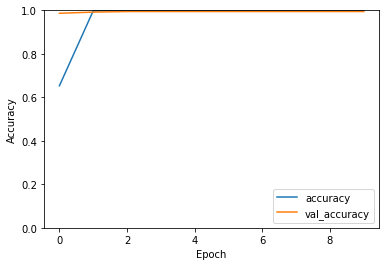

In [13]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.savefig('accuracy_graph.png')
plt.show()

12/12 [==============================] - 3s 269ms/step


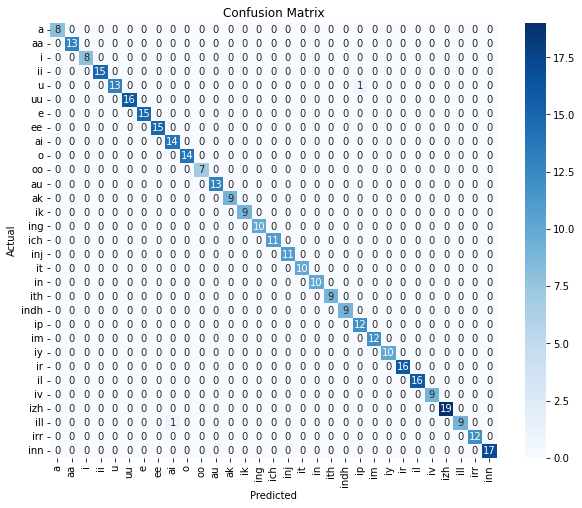

In [15]:
labels = ['a', 'aa', 'i', 'ii', 'u', 'uu', 'e', 'ee', 'ai', 'o', 'oo', 'au', 'ak', 'ik', 'ing', 'ich', 'inj', 'it', 'in', 'ith', 'indh', 'ip', 'im', 'iy', 'ir', 'il', 'iv', 'izh', 'ill', 'irr', 'inn']
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.savefig('Findings/um_confusion_matrix.png')
plt.show()

## Implementation

In [ ]:
import cv2
from cvzone.HandTrackingModule import HandDetector
from cvzone.ClassificationModule import Classifier
import numpy as np
import math
from gtts import gTTS
from playsound import playsound
import os

cap = cv2.VideoCapture(0)
detector = HandDetector(maxHands=1)
classifier = Classifier("Model/uyirmei_t_model.h5", "Model/um_t_labels.txt")

offset = 20
imgSize = 300

#folder = "Data/C"
#counter = 0

labels = ['a', 'aa', 'i', 'ii', 'u', 'uu', 'e', 'ee', 'ai', 'o', 'oo', 'au', 'ak', 'ik', 'ing', 'ich', 'inj', 'it', 'in', 'ith', 'indh', 'ip', 'im', 'iy', 'ir', 'il', 'iv', 'izh', 'ill', 'irr', 'inn']

while True:
    success, img = cap.read()
    imgOutput = img.copy()
    hands, img = detector.findHands(img)
    if hands:
        hand = hands[0]
        x, y, w, h = hand['bbox']

        imgWhite = np.ones((imgSize, imgSize, 3), np.uint8) * 255
        imgCrop = img[y - offset:y + h + offset, x - offset:x + w + offset]

        imgCropShape = imgCrop.shape

        aspectRatio = h / w

        if aspectRatio > 1:
            k = imgSize / h
            wCal = math.ceil(k * w)
            imgResize = cv2.resize(imgCrop, (wCal, imgSize))
            imgResizeShape = imgResize.shape
            wGap = math.ceil((imgSize - wCal) / 2)
            imgWhite[:, wGap:wCal + wGap] = imgResize
            prediction, index = classifier.getPrediction(imgWhite, draw=False)
            print(prediction, index, labels[index])

        else:
            k = imgSize / w
            hCal = math.ceil(k * h)
            imgResize = cv2.resize(imgCrop, (imgSize, hCal))
            imgResizeShape = imgResize.shape
            hGap = math.ceil((imgSize - hCal) / 2)
            imgWhite[hGap:hCal + hGap, :] = imgResize
            prediction, index = classifier.getPrediction(imgWhite, draw=False)
        
         # Text-to-speech using gTTS
        '''predicted_text = labels[index]
        tts = gTTS(predicted_text, lang='ta')  # 'ta' is the language code for Tamil
        tts.save("predicted_audio.mp3")

        # Play the generated audio
        playsound("predicted_audio.mp3")
        os.remove("predicted_audio.mp3")'''

        cv2.rectangle(imgOutput, (x - offset, y - offset-50),
                      (x - offset+90, y - offset-50+50), (255, 0, 255), cv2.FILLED)
        cv2.putText(imgOutput, labels[index], (x, y -26), cv2.FONT_HERSHEY_COMPLEX, 1.7, (255, 255, 255), 2)
        cv2.rectangle(imgOutput, (x-offset, y-offset),
                      (x + w+offset, y + h+offset), (255, 0, 255), 4)


        #cv2.imshow("ImageCrop", imgCrop)
        #cv2.imshow("ImageWhite", imgWhite)

    cv2.imshow("Image", imgOutput)
    if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
    #cv2.waitKey(1)

In [2]:
import cv2
import numpy as np
from cvzone.HandTrackingModule import HandDetector
from cvzone.ClassificationModule import Classifier
from PIL import Image, ImageTk
import math
import tkinter as tk
from tkinter import Label, Button, Frame

class Application:
    def __init__(self, root):
        self.root = root
        self.root.title("Sign Language Interpreter")
        self.root.geometry("1260x700")
        self.root.config(background="#001F3F")  # Dark navy blue background
        self.root.pack_propagate(False)  # Prevent window from expanding
        self.create_widgets()

        # Initialize hand detector and classifier
        self.detector = HandDetector(maxHands=1)
        self.classifier = Classifier("Model/uyir_t_model.h5", "Model/u_t_labels.txt")

        # Initialize video capture
        self.cap = cv2.VideoCapture(0)
        self.offset = 20
        self.imgSize = 300
        self.labels = ['அ', 'ஆ', 'இ', 'ஈ', 'உ', 'ஊ', 'எ', 'ஏ', 'ஐ', 'ஒ', 'ஓ', 'ஔ', 'ஃ']
        self.predicted_word = ""

        # Start video loop
        self.video_loop()

    def create_widgets(self):
        # Create a frame to hold the title label
        title_frame = Frame(self.root, bg="#001F3F")
        title_frame.pack(fill=tk.X, padx=20, pady=(20, 0))

        # Title label
        self.title_label = Label(title_frame, text="Sign Language Interpreter", font=("Comic Sans MS", 24, "bold"), bg="#001F3F", fg="white")
        self.title_label.pack(pady=20)

        # Create a frame to hold the panels
        panels_frame = Frame(self.root, bg="#001F3F")
        panels_frame.pack(fill=tk.BOTH, expand=True, padx=20, pady=20)

        # Left panel
        self.panel = Label(panels_frame)
        self.panel.pack(side=tk.LEFT, padx=20)

        # Right panel and buttons
        panel2_buttons_frame = Frame(panels_frame, bg="#001F3F")
        panel2_buttons_frame.pack(side=tk.LEFT, fill=tk.BOTH, expand=True)

        # Right panel
        self.panel2 = Label(panel2_buttons_frame)
        self.panel2.pack(side=tk.LEFT, padx=20)

        # Buttons frame
        buttons_frame = Frame(panel2_buttons_frame, bg="#001F3F")
        buttons_frame.pack(side=tk.LEFT, padx=20, pady=20)

        # Stop button
        stop_button = Button(buttons_frame, text="Stop", font=("Comic Sans MS", 10, "bold"), bg="#E48F1B", fg="#34262B", command=self.stop)
        stop_button.grid(row=0, column=0, padx=10)

        # Restart button
        '''restart_button = Button(buttons_frame, text="Restart", font=("Comic Sans MS", 10, "bold"), bg="#E48F1B", fg="#34262B", command=self.restart)
        restart_button.grid(row=0, column=1, padx=10)'''

        # Tamil letter button
        tamil_button = Button(buttons_frame, text="Tamil Letter", font=("Comic Sans MS", 10, "bold"), bg="#E48F1B", fg="#34262B", command=self.switch_to_tamil)
        tamil_button.grid(row=1, column=0, padx=10, pady=10)

        # Words button
        words_button = Button(buttons_frame, text="Words", font=("Comic Sans MS", 10, "bold"), bg="#E48F1B", fg="#34262B", command=self.switch_to_words)
        words_button.grid(row=1, column=1, padx=10, pady=10)

        # Widgets below the panels
        self.bottom_frame = Frame(self.root, bg="#001F3F")
        self.bottom_frame.pack(fill=tk.X, padx=20, pady=20)

        self.T2 = Label(self.bottom_frame, text="Word :", font=("Comic Sans MS", 16, "bold"), bg="#001F3F", fg="white")
        self.T2.grid(row=0, column=0, pady=(20, 0), padx=(20, 0), sticky="w")

        self.word_label = Label(self.bottom_frame, text="", font=("Comic Sans MS", 16), bg="#001F3F", fg="white")
        self.word_label.grid(row=0, column=1, pady=(20, 0), padx=(10, 0), sticky="w")

        speak_button = Button(self.bottom_frame, text="Speak", font=("Comic Sans MS", 10, "bold"), bg="#E48F1B", fg="#34262B", command=self.speak_word)
        speak_button.grid(row=0, column=2, pady=(20, 0), padx=(50, 20), sticky="w")

        clear_button = Button(self.bottom_frame, text="Clear", font=("Comic Sans MS", 10, "bold"), bg="#E48F1B", fg="#34262B", command=self.clear_word)
        clear_button.grid(row=0, column=3, pady=(20, 0), padx=(0, 20), sticky="w")

    def video_loop(self):
        success, img = self.cap.read()
        imgOutput = img.copy()
        hands, img = self.detector.findHands(img)
        if hands:
            hand = hands[0]
            x, y, w, h = hand['bbox']

            imgWhite = np.ones((self.imgSize, self.imgSize, 3), np.uint8) * 255
            imgCrop = img[y - self.offset:y + h + self.offset, x - self.offset:x + w + self.offset]

            imgCropShape = imgCrop.shape

            aspectRatio = h / w

            if aspectRatio > 1:
                k = self.imgSize / h
                wCal = math.ceil(k * w)
                imgResize = cv2.resize(imgCrop, (wCal, self.imgSize))
                imgResizeShape = imgResize.shape
                wGap = math.ceil((self.imgSize - wCal) / 2)
                imgWhite[:, wGap:wCal + wGap] = imgResize
                prediction, index = self.classifier.getPrediction(imgWhite, draw=False)
                self.predicted_word = self.labels[index]

            else:
                k = self.imgSize / w
                hCal = math.ceil(k * h)
                imgResize = cv2.resize(imgCrop, (self.imgSize, hCal))
                imgResizeShape = imgResize.shape
                hGap = math.ceil((self.imgSize - hCal) / 2)
                imgWhite[hGap:hCal + hGap, :] = imgResize
                prediction, index = self.classifier.getPrediction(imgWhite, draw=False)
                self.predicted_word = self.labels[index]

            self.word_label.config(text=self.predicted_word)

            # Display resized hand image on panel2
            imgResize = cv2.cvtColor(imgResize, cv2.COLOR_BGR2RGB)
            imgResize = Image.fromarray(imgResize)
            imgtk = ImageTk.PhotoImage(image=imgResize)
            self.panel2.imgtk = imgtk
            self.panel2.config(image=imgtk)

        imgOutput = cv2.cvtColor(imgOutput, cv2.COLOR_BGR2RGB)
        imgOutput = cv2.resize(imgOutput, (640, 480))

        imgOutput = Image.fromarray(imgOutput)
        imgtk = ImageTk.PhotoImage(image=imgOutput)
        self.panel.imgtk = imgtk
        self.panel.config(image=imgtk)

        self.root.after(10, self.video_loop)
        
    def speak_word(self):
        pass

    def clear_word(self):
        self.word_label.config(text="")
        self.predicted_word = ""

    def stop(self):
        self.cap.release() 
        self.root.after(2000, self.root.destroy) 
        
    def switch_to_tamil(self):
        # Update labels and model for Tamil letters
        self.labels = ['அ', 'ஆ', 'இ', 'ஈ', 'உ', 'ஊ', 'எ', 'ஏ', 'ஐ', 'ஒ', 'ஓ', 'ஔ', 'ஃ', 'க்', 'ங்','ச்','ஞ்','ட்','ண்','த்','ந்','ப்','ம்','ய்','ர்','ல்','வ்','ழ்','ள்','ற்','ன்']
        self.classifier = Classifier("Model/uyirmei_t_model.h5", "Model/um_t_labels.txt")

    def switch_to_words(self):
        # Update labels and model for English words
        self.labels = ['Bathroom', 'Break', 'Call', 'Cute', 'Dad', 'Dislike', 'Drink', 'Fighting', 'Food', 'Happy', 'Hello', 'I Love You', 'Its Me', 'Like', 'Milk', 'Mom', 'Name', 'No', 'Ok', 'Peace', 'Promise', 'Ready', 'Saying', 'Sibling', 'Silence', 'Stop', 'Terrific', 'Thank You', 'Water', 'Yes']
        self.classifier = Classifier("word_model.h5", "labels.txt")

root = tk.Tk()
app = Application(root)
root.mainloop()





1/1 [==============================] - 0s 43ms/step


1/1 [==============================] - 0s 36ms/step


1/1 [==============================] - 0s 36ms/step


1/1 [==============================] - 0s 39ms/step


1/1 [==============================] - 0s 40ms/step


Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\nandh\anaconda3\lib\tkinter\__init__.py", line 1892, in __call__
    return self.func(*args)
  File "C:\Users\nandh\anaconda3\lib\tkinter\__init__.py", line 814, in callit
    func(*args)
  File "C:\Users\nandh\AppData\Local\Temp\ipykernel_16280\2250242968.py", line 112, in video_loop
    imgResize = cv2.resize(imgCrop, (wCal, self.imgSize))
cv2.error: OpenCV(4.5.5) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

